## 决策树 Decision tree

[wiki](./doc/决策树.pdf)

Accuracy: 90.00% 


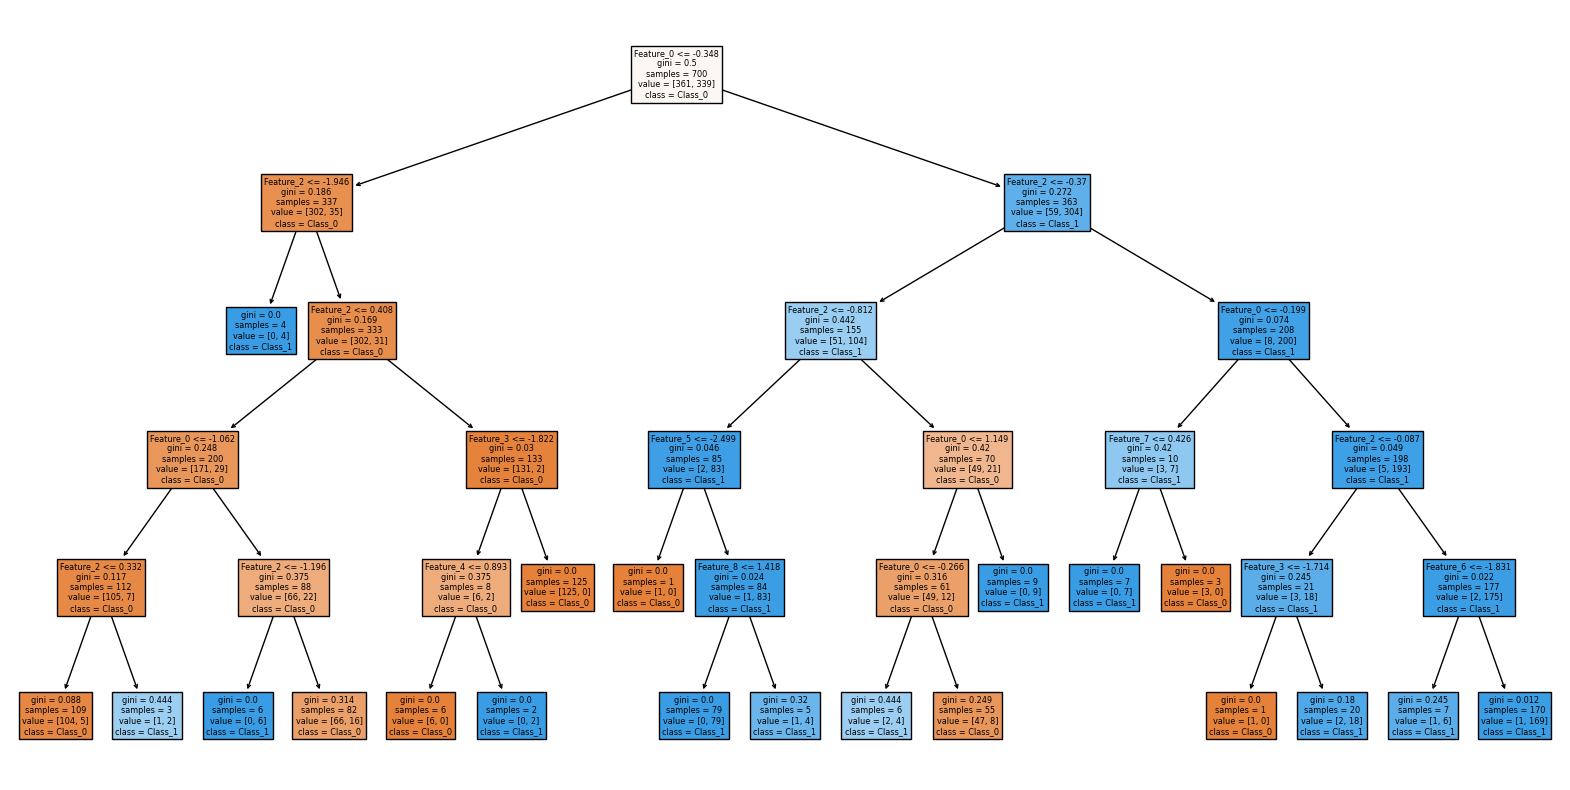

|--- Feature_0 <= -0.35
|   |--- Feature_2 <= -1.95
|   |   |--- class: 1
|   |--- Feature_2 >  -1.95
|   |   |--- Feature_2 <= 0.41
|   |   |   |--- Feature_0 <= -1.06
|   |   |   |   |--- Feature_2 <= 0.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature_2 >  0.33
|   |   |   |   |   |--- class: 1
|   |   |   |--- Feature_0 >  -1.06
|   |   |   |   |--- Feature_2 <= -1.20
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Feature_2 >  -1.20
|   |   |   |   |   |--- class: 0
|   |   |--- Feature_2 >  0.41
|   |   |   |--- Feature_3 <= -1.82
|   |   |   |   |--- Feature_4 <= 0.89
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature_4 >  0.89
|   |   |   |   |   |--- class: 1
|   |   |   |--- Feature_3 >  -1.82
|   |   |   |   |--- class: 0
|--- Feature_0 >  -0.35
|   |--- Feature_2 <= -0.37
|   |   |--- Feature_2 <= -0.81
|   |   |   |--- Feature_5 <= -2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Feature_5 >  -2.50
|   |   |   |   |--- Feature_8 <= 1.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# 生成模拟数据
features_ = 10
X, y = make_classification(n_samples=1000, n_features=features_, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练决策树模型
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)  # 注意这里应该用 X_train 和 y_train 而不是整个数据集

# 使用测试集进行预测
y_pred = dt.predict(X_test)

# 计算准确率
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}% ")


# 可视化决策树1
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Feature_'+str(i) for i in range(features_)], class_names=['Class_0', 'Class_1'])
plt.show()

# 可视化决策树2
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=['Feature_'+str(i) for i in range(features_)])
print(tree_text)

## If-else结构

决策树模型可以被理解为由许多嵌套的if-else语句构成的。每个决策节点（非叶节点）都表示一个条件判断，这个判断基于特定的特征和阈值。根据数据点在这个特征上的值是否满足条件，数据将被分到左子树或右子树。这个过程一直重复，直到达到叶节点，叶节点代表最终的决策结果（在分类任务中是类别，在回归任务中是值）。

### 决策树的if-else结构

决策树的每一步分裂都可以视为一个if-else条件，这使得决策树非常直观，容易被人理解。例如，假设我们有一个简单的二维数据集，特征为年龄和收入，目标是预测一个人是否会购买某产品。一个可能的决策树可能是这样的：

1. **第一层（根节点）**：如果年龄大于50岁，则进入左子树，否则进入右子树。
2. **第二层（左子树）**：如果收入超过70k，则预测为“会购买”，否则预测为“不会购买”。
3. **第二层（右子树）**：如果年龄小于30岁，则预测为“不会购买”，否则进一步检查其他条件。

这种结构可以直接转换为if-else代码块，如下所示：

```python
def predict(age, income):
    if age > 50:
        if income > 70000:
            return "会购买"
        else:
            return "不会购买"
    else:
        if age < 30:
            return "不会购买"
        else:
            # 进一步的条件检查
            pass
```

### 决策树的优点

- **可解释性强**：由于决策树模拟了人类决策过程中的逻辑判断，因此它们通常比其他更复杂的模型更容易理解和解释。
- **不需要数据标准化**：决策树不像某些算法那样对数据的尺度敏感，因此不需要对特征进行标准化或归一化。
- **能处理非线性关系**：决策树能很好地处理数据间的非线性关系。

### 决策树的缺点

- **过拟合风险**：决策树很容易过拟合，尤其是当树的深度很大时。通常需要通过设置树的最大深度、最小叶节点样本数等参数或通过剪枝技术来控制过拟合。
- **稳定性低**：小的数据变化可能导致生成完全不同的树，这使得决策树模型的稳定性相对较低。

决策树因其简单和直观的if-else决策逻辑，被广泛应用于各种机器学习任务，特别是在需要解释模型决策过程的场合。


## 决策树节点生成规则

在决策树中，每个节点的判断条件是通过一系列的算法步骤来确定的，目的是最优化某些特定的标准，通常是信息增益、基尼不纯度或均方误差等。这些标准帮助模型决定在每个节点上应该如何最好地分割数据集，以达到最清晰的分类或最准确的预测。以下是决策树中节点判断条件确定的基本步骤：

### 1. 选择最佳分割特征和分割点

决策树的每个节点都是基于特定的特征和该特征的一个值（分割点）来分割数据的。选择哪个特征和特征的哪个值作为分割点，是通过评估每个特征的每个可能的分割点来完成的。对于每个候选的分割，算法计算分割后子节点的纯度或误差，并选择使得整体纯度提升最大（或误差最小）的特征和分割点。

### 2. 纯度增益和基尼不纯度

以下是两种常用的标准来评估分割的好坏：

- **信息增益**：在分类问题中，信息增益是父节点的熵与子节点熵的加权平均的差。熵是衡量数据不确定性的一个指标。信息增益越大，意味着使用该特征进行分割后带来的纯度提升越大。
  
- **基尼不纯度**：基尼不纯度是衡量一个节点中类别随机混合的程度。如果一个节点中的所有记录都属于同一个类别，则基尼不纯度为0。选择分割点时，通常选择那些导致子节点基尼不纯度最低的特征。

### 3. 均方误差

在回归问题中，通常使用均方误差（MSE）来评估分割的效果。分割的目标是选择一个特征和分割点，使得分割后的子节点中的目标变量的MSE最小。

### 4. 递归分割

一旦选择了最佳的分割特征和点，数据集就会被分割成两个子节点。然后，算法递归地在每个子节点上重复这个过程，直到满足停止条件，如达到最大深度、节点中的样本数量小于某个阈值或节点的纯度已经足够高。

### 5. 剪枝

为了避免过拟合，决策树在构建完成后通常会进行剪枝。剪枝过程涉及去除一些不提供大量信息增益的分支，以简化模型并提高其在未见数据上的表现。

这些步骤共同确定了决策树中每个节点的最优判断条件，使得模型在训练数据上有很好的性能，同时也尽可能保持对新数据的泛化能力。


## 决策树超参

决策树算法中可以调整的主要参数包括：

1. criterion：用于衡量分割质量的指标，可选择"gini"（基尼不纯度）或"entropy"（信息增益）。

2. splitter：在每个节点选择分割特征的策略，可选择"best"（选择最佳分割）或"random"（随机选择特征）。

3. max_depth：树的最大深度。过大可能导致过拟合，过小可能欠拟合。

4. min_samples_split：内部节点分割所需的最小样本数。增大该值可以减小模型复杂度。

5. min_samples_leaf：叶节点所需的最小样本数。增大该值可以减小模型复杂度。

6. min_weight_fraction_leaf：叶节点所需的（所有输入样本的）权重总和的最小加权分数。

7. max_features：寻找最佳分割时考虑的特征数量，可以是整数、浮点数、"auto"、"sqrt"、"log2"或None。

8. random_state：控制估计器的随机性。

9. max_leaf_nodes：最大叶节点数。

10. min_impurity_decrease：如果节点的分割导致不纯度减少大于等于该值，则该节点将被分割。

11. class_weight：与每个类别关联的权重。

12. ccp_alpha：用于最小化成本复杂度修剪的复杂度参数。

这些参数可以通过网格搜索、随机搜索等方法进行调优，以获得更好的模型性能。调参时需要平衡模型的偏差和方差，避免过拟合和欠拟合。



## 使用决策树对ECG数据集分类

Accuracy: 91.78% 


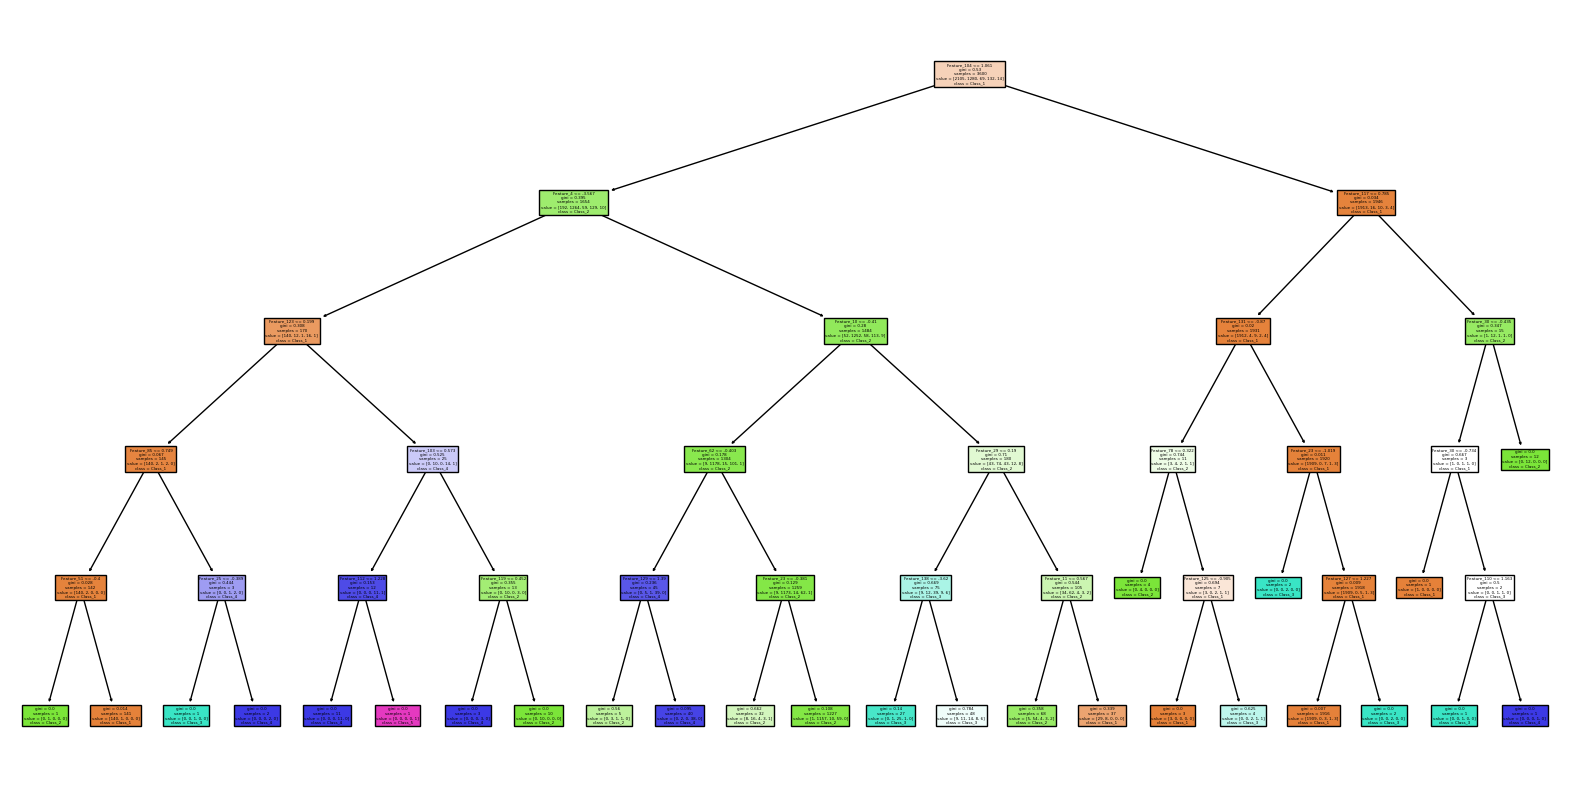

|--- Feature_104 <= 1.06
|   |--- Feature_4 <= -3.57
|   |   |--- Feature_123 <= 0.20
|   |   |   |--- Feature_85 <= 0.75
|   |   |   |   |--- Feature_51 <= -0.40
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Feature_51 >  -0.40
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Feature_85 >  0.75
|   |   |   |   |--- Feature_25 <= -0.39
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- Feature_25 >  -0.39
|   |   |   |   |   |--- class: 4.0
|   |   |--- Feature_123 >  0.20
|   |   |   |--- Feature_103 <= 0.57
|   |   |   |   |--- Feature_112 <= 1.23
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- Feature_112 >  1.23
|   |   |   |   |   |--- class: 5.0
|   |   |   |--- Feature_103 >  0.57
|   |   |   |   |--- Feature_119 <= 0.45
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- Feature_119 >  0.45
|   |   |   |   |   |--- class: 2.0
|   |--- Feature_4 >  -3.57
|   |   |--- Feature_10 <= -0.41
|   |   |   |--- Feature_62 <= -0.40
|   |   |   |   |--- 

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 读取数据集
data_train = np.loadtxt('./ECG5000/data/ECG5000_TEST.txt')

# 获取data和label
X, y = data_train[:, 1:], data_train[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features_ = X_train.shape[1]
class_ = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5']

# 训练决策树模型
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)  # 注意这里应该用 X_train 和 y_train 而不是整个数据集

# 使用测试集进行预测
y_pred = dt.predict(X_test)

# 计算准确率
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}% ")


# 可视化决策树1
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Feature_'+str(i) for i in range(features_)], class_names=class_)
plt.show()

# 可视化决策树2
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=['Feature_'+str(i) for i in range(features_)])
print(tree_text)